<h1> <font color='blue'> CVEN 5301: ST: Computational Skills in Engineering using Python </font> </h1>

<h4> <center> <font color ='red'> Exam 1: Solution Key: Venki Uddameri </font></center></h4>

<h2> Problem 1: </h2>

A 55 ft culvert will pass a roadway. At flood stage the water ponded behind the roadway (hi) will be 6 ft above the culvert.  The design discharge is, q, is 40 cfs. The discharge coefficient, Cd, is 0.6 The acceleration due to gravity, g, is 32.2 ft/s$^2$.  What is the culvert diameter? 

The culvert diameter can be computed by obtaining the roots of the following equation:

$$
f(D) = D^5 - 12 D^4 +16 \frac{q^2}{(\pi^2 C_d^2 g)}
$$

Design guidelines recommend that the culvert diamater should be as small as possible and not exceed 10 ft.  Solve for the Culver Diameter using Newton Raphson Method.

<h3> Newton-Raphson Method </h3>

The estimate at the (i+1) iteration of the Newton-Raphson Method is obtained from the i$^{th}$ estimate as follows:
$$
D_{i+1} = D_{i} - \frac{f(D_i)}{f'(D_i)}
$$
The algorithm starts with an initial guess of D and iterates successively till the absolute difference between two successive iterations is below an acceptable tolerance. 

<h3> Approximate Unknown Roots </h3>

We know that the diameter of the culvert cannot be zero or less.  We also know that it should not be greater than 10 but as small as possible.  In addition, as f(D) is a 5$^{th}$ power polynomial equation it will have 5 roots.  It is therefore, useful to plot the function f(D) and see where the likely roots are going to be. 

In [2]:
# Import libraries
import math
import numpy as np
from matplotlib import pyplot as plt
# Define function f(D)
def fd(D,q,Cd):
    g = 32.2
    const = 16*(q**2/(Cd**2*math.pi*g))
    fdx = np.power(D,5) - 12*np.power(D,4) + const
    return(fdx)


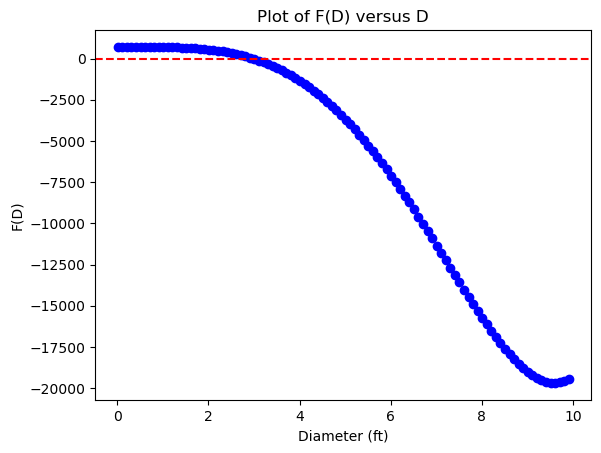

In [5]:
# compute f(D) versus D
# Use ft for length, s for time
q = 40 #cfs
Cd = 0.6
Dr = np.arange(0.01,10,0.1) 
fDr = fd(Dr,q,Cd)
# Make a plot
plt.plot(Dr,fDr,'bo')
plt.xlabel('Diameter (ft)')
plt.ylabel('F(D)')
plt.title('Plot of F(D) versus D')
plt.axhline(y = 0, color ="red", linestyle ="--")
plt.show()  # Plot below indicates the value is between 2 and 4

<h3> Newton Raphson Implementation

In [6]:
# Define Function f'(D)
def fp(D):
    fpx = 5*np.power(D,4) - 48 * np.power(D,3)
    return(fpx)

In [7]:
# Function to perform Newton Raphson method
def newton(D,q,Cd):
    tol = 1E-06
    res = 100
    i = 0
    while(res > tol):
        fdi = fd(D,q,Cd)
        fpdi = fp(D)
        Dnew = D - fdi/fpdi
        res = np.abs(D-Dnew)
        D = Dnew
        i = i + 1
    return(D,i)
    

In [15]:
D = 2.  #Supply Initial Guess
Dopt,iterx = newton(D,q,Cd) #Call Newton Raphson
# Print Results
print("Newton-Raphson Algorithm Converged in: " + str(iterx) + " Iterations")
print("The culvert Diameter is:" + str(round(Dopt,3)) + ' ft')


Newton-Raphson Algorithm Converged in: 6 Iterations
The culvert Diameter is:2.97 ft
